## Objetivo do Projeto

Este projeto utiliza a técnica de Análise de Componentes Principais (PCA) para reduzir a dimensionalidade de um conjunto de dados com indicadores socioeconômicos de diversos países.

O objetivo final é apoiar a decisão de uma rede de fast-food internacional sobre onde abrir novas franquias, identificando padrões estruturais entre os países com base em métricas como expectativa de vida, inflação, arrecadação, mortalidade infantil e outras.

Através do PCA, transformaremos variáveis complexas em eixos interpretáveis de decisão, que permitirão uma visualização clara das diferenças entre os países e uma recomendação fundamentada.


In [1]:
# EDA e Visualização dos Dados
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Machine Learning
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import numpy as np

### Carregar dados

In [2]:
df_countries = pd.read_csv('.\dataset\country_data.csv', sep=';', decimal=',') 
# informamos ao pandas que os separadores das colunas são ';' e os decimais são ','

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Carolina\AppData\Local\Temp\ipykernel_2752\1722298281.py:1: SyntaxWarning: invalid escape sequence '\d'
  df_countries = pd.read_csv('.\dataset\country_data.csv', sep=';', decimal=',')


In [3]:
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          165 non-null    object 
 1   child_mort       165 non-null    float64
 2   exports          165 non-null    float64
 3   health           165 non-null    float64
 4   imports          165 non-null    float64
 5   income           165 non-null    int64  
 6   inflation        165 non-null    float64
 7   life_expec       165 non-null    float64
 8   total_fer        165 non-null    float64
 9   gdpp             165 non-null    int64  
 10  income_category  165 non-null    object 
dtypes: float64(7), int64(2), object(2)
memory usage: 14.3+ KB


In [4]:
df_countries.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,income_category
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,Low income
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,Upper middle income
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,Lower middle income
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,Lower middle income
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,High income
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,Upper middle income
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,Upper middle income
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,High income
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,High income
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,Upper middle income


Carregamos os dados contendo indicadores socioeconômicos de vários países. Este dataset será a base para nossas análises e para a aplicação do PCA.

Antes da análise, verificamos os tipos de dados e a existência de valores ausentes.


### EDA

##### Análise Univariada


In [5]:
df_countries.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,38.567273,41.193327,6.825576,46.999793,17183.412121,7.585612,70.505455,2.959818,13011.963636
std,40.480851,27.560749,2.759425,24.233083,19389.968166,10.198185,8.935045,1.518166,18428.279743
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,7.900000,23.800000,4.930000,30.400000,3340.000000,1.770000,65.300000,1.800000,1310.000000
50%,19.700000,35.000000,6.320000,43.300000,9940.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.200000,51.400000,8.650000,58.900000,22900.000000,10.600000,76.800000,3.910000,14600.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [ ]:
# Visualizando distribuição de renda por categoria
percentual_income_categoty = df_countries.value_counts('income_category') / len(df_countries) * 100
px.bar(percentual_income_categoty, color=percentual_income_categoty.index)

In [38]:
# Distribuição de renda
px.histogram(df_countries['income'], title='Histograma da Variável Income')

In [ ]:
# Distribuição do pib per capita
px.histogram(df_countries['gdpp'], title='Histograma da Variável GDPP (PIB per capita)')

In [ ]:
# Distriubição de inflation
px.histogram(df_countries['inflation'], title='Histograma da Variável Inflation')

In [ ]:
# Distriubição de life expectation
px.histogram(df_countries['life_expec'], title='Histograma da Variável Life Expectation')

#### Análise Bivariada

In [ ]:
# Visualizando comportamento da variável income com income_category
px.box(df_countries, x='income', y='income_category', color='income_category', orientation='h', hover_data=['country'])

In [ ]:
# Comportamento da variável income_category com PIB per capita  
px.box(df_countries, x='gdpp', y='income_category', color='income_category', orientation='h', hover_data=['country'])

In [ ]:
# Comportamento da variável income_category com inflation
px.box(df_countries, x='inflation', y='income_category', color='income_category', orientation='h', hover_data=['country'])

In [ ]:
# Comportamento da variável income_category com life expectation
px.box(df_countries, x='life_expec', y='income_category', color='income_category', orientation='h', hover_data=['country'])

In [ ]:
# Dispersão entre renda e PIB per capita
px.scatter(df_countries, x='income', y='gdpp', hover_data=['country'], color='income_category')

In [ ]:
# Criando objeto da matriz de correlação
matriz_correlacao_countries = df_countries.corr(numeric_only=True)

<Axes: >

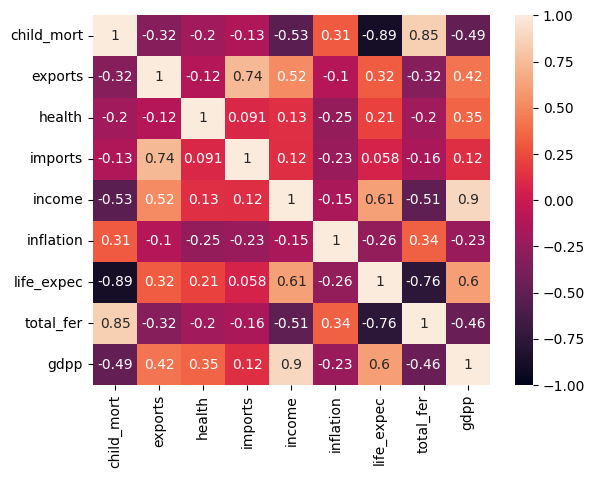

In [ ]:
# Visualizando matriz de correlação
sns.heatmap(matriz_correlacao_countries, vmin=-1, vmax=1, annot=True)

Realizamos uma análise exploratória para entender a distribuição das variáveis, identificar padrões, outliers e correlações relevantes.

Essa etapa é essencial para validar a aplicabilidade do PCA, já que ele é fortemente baseado na variância dos dados e nas relações lineares entre as variáveis.


### Treinar Algoritmo PCA

In [ ]:
# Copiando o DataFrame para evitar alterações no original
X = df_countries.copy()
# Excluindo variáveis categóricas
X.drop(columns=['country', 'income_category'], axis=1, inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  165 non-null    float64
 1   exports     165 non-null    float64
 2   health      165 non-null    float64
 3   imports     165 non-null    float64
 4   income      165 non-null    int64  
 5   inflation   165 non-null    float64
 6   life_expec  165 non-null    float64
 7   total_fer   165 non-null    float64
 8   gdpp        165 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 11.7 KB


In [ ]:
# Normalizando as features numéricas
numeric_features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

numeric_tranformer = StandardScaler()

# Criando objeto ColumnTransformer para aplicar a normalização apenas nas features numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_tranformer, numeric_features)
    ]
)

In [ ]:
# Treindando o preprocessor e transformando os dados
X_transformed = preprocessor.fit_transform(X)

### Normalização

Antes de aplicar o PCA, os dados foram normalizados para garantir que todas as variáveis contribuam igualmente na análise. Variáveis com escalas diferentes (como PIB e expectativa de vida) poderiam dominar a análise sem esse ajuste.


In [ ]:
# Criando objeto PCA para reduzir a dimensionalidade
modelo_pca = PCA(n_components=3)

In [ ]:
# Apliando PCA nos dados transformados
X_pca = modelo_pca.fit_transform(X_transformed)

In [ ]:
# Criando dataframe com os componentes principais
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])

In [ ]:
# Vizualizando os componentes principais
df_pca.head(5)

,PC1,PC2,PC3
0,-2.898491,0.043830,-0.674704
1,0.435969,-0.602095,-0.336181
2,-0.294489,-0.393013,1.237849
3,-2.941128,1.746346,1.498419
4,1.038913,0.117437,-0.255625


In [ ]:
# Join dos componentes principais com o dataframe original
df_countries['PC1'] = df_pca['PC1']
df_countries['PC2'] = df_pca['PC2']
df_countries['PC3'] = df_pca['PC3']

In [ ]:
# Vizualizando os componentes principais no dataframe original
df_countries.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,income_category,PC1,PC2,PC3
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Low income,-2.898491,0.043830,-0.674704
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Upper middle income,0.435969,-0.602095,-0.336181
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Lower middle income,-0.294489,-0.393013,1.237849
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Lower middle income,-2.941128,1.746346,1.498419
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,High income,1.038913,0.117437,-0.255625


### Visualizar Resultados

In [27]:
# Autovetores
autovetores = modelo_pca.explained_variance_

# Autovalores
autovalores = modelo_pca.components_

In [ ]:
# Visualizando as variancias explicadas por cada componente principal
print('Autoverotes:')
print(autovetores)
print('\nAutovalores:')
print(autovalores)

Autoverotes:
[4.18194258 1.55676483 1.15683401]

Autovalores:
[[-0.41944537  0.28242091  0.15068193  0.16069962  0.39721431 -0.20064752
   0.42542863 -0.40370133  0.39213733]
 [ 0.18639458  0.61906392 -0.26537269  0.6623149   0.03301443  0.03814569
  -0.21355639  0.15172601 -0.04196516]
 [-0.02457745  0.11382205 -0.57151155 -0.33939771  0.32266099  0.63616571
   0.11811594  0.02417555  0.14584745]]


In [30]:
# Reconstrução dos dados
X_recovered = modelo_pca.inverse_transform(X_pca)

In [37]:
# Visualizar Recovered
print(X_recovered.shape[0])
print(X_recovered.shape[1])

165
9


In [32]:
# Calcular o erro de reconstrução
reconstruction_error = mean_squared_error(X_transformed, X_recovered)
print('Erro de Reconstrução:', reconstruction_error)

Erro de Reconstrução: 0.23847219349860982


## Aplicação do PCA

Aplicamos a Análise de Componentes Principais para reduzir a dimensionalidade dos dados. Foram extraídos os três primeiros componentes principais, que explicam a maior parte da variância dos dados.

Esses componentes serão usados para gerar visualizações e interpretar padrões entre os países.


### Visualizar Componentes vs Variáveis

In [61]:
loadings_df = pd.DataFrame(autovalores, columns=X.columns, index=['PC1', 'PC2', 'PC3'])

In [53]:
loadings_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
PC1,-0.419445,0.282421,0.150682,0.160700,0.397214,-0.200648,0.425429,-0.403701,0.392137
PC2,0.186395,0.619064,-0.265373,0.662315,0.033014,0.038146,-0.213556,0.151726,-0.041965
PC3,-0.024577,0.113822,-0.571512,-0.339398,0.322661,0.636166,0.118116,0.024176,0.145847


In [50]:
# Exibir os pesos do PC1 ordenados por magnitude
loadings_df.loc['PC1'].sort_values(ascending=False)


life_expec    0.425429
income        0.397214
gdpp          0.392137
exports       0.282421
imports       0.160700
health        0.150682
inflation    -0.200648
total_fer    -0.403701
child_mort   -0.419445
Name: PC1, dtype: float64

O componente principal 1 (PC1) se mostrou fortemente associado a indicadores de qualidade de vida e desenvolvimento econômico. Países com altos valores em PC1 apresentam elevada expectativa de vida, renda e PIB per capita, enquanto países com valores negativos têm altos níveis de mortalidade infantil, fertilidade e inflação. Esse componente pode ser interpretado como um índice de __desenvolvimento socioeconômico__.

In [54]:
# Exibir os pesos do PC2 ordenados por magnitude
loadings_df.loc['PC2'].sort_values(ascending=False)


imports       0.662315
exports       0.619064
child_mort    0.186395
total_fer     0.151726
inflation     0.038146
income        0.033014
gdpp         -0.041965
life_expec   -0.213556
health       -0.265373
Name: PC2, dtype: float64

O PC2 reflete um eixo de __abertura econômica__, onde países com forte atividade de comércio internacional (importação/exportação) se diferenciam de países com maiores índices de saúde e longevidade. Isso pode indicar perfis voltados para produção/exportação em detrimento de qualidade de vida local.

In [55]:
# Exibir os pesos do PC3 ordenados por magnitude
loadings_df.loc['PC3'].sort_values(ascending=False)


inflation     0.636166
income        0.322661
gdpp          0.145847
life_expec    0.118116
exports       0.113822
total_fer     0.024176
child_mort   -0.024577
imports      -0.339398
health       -0.571512
Name: PC3, dtype: float64

O PC3 distingue países com __altos níveis de inflação e renda__,possivelmente refletindo economias instáveis com desigualdade, daqueles que priorizam infraestrutura de saúde e mantêm relações comerciais externas estáveis.

## Interpretação dos Componentes

Através dos loadings, foi possível interpretar o significado de cada componente:

- **PC1**: Representa o nível de desenvolvimento socioeconômico (alta expectativa de vida, renda, PIB, baixa mortalidade infantil).
- **PC2**: Reflete o grau de abertura econômica (importações e exportações).
- **PC3**: Relacionado à inflação e infraestrutura de saúde.

Essa interpretação será usada para direcionar a visualização e as recomendações estratégicas.


### Visualizar Chart 3D

In [66]:
# Dataset com componentes + país + grupo (ex: continente ou categoria socioeconômica)
from sklearn.cluster import KMeans

# Copiar o Dataframe com os componentes principais para plotagem
df_pca_plot = df_countries.copy()
# Clustering nos componentes
kmeans = KMeans(n_clusters=3, random_state=42)
df_pca_plot['grupo'] = kmeans.fit_predict(df_pca_plot[['PC1', 'PC2', 'PC3']])

df_pca_plot['país'] = df_countries['country']  # Substituir com a coluna real de nomes
fig = px.scatter_3d(
    df_pca_plot,
    x='PC1', y='PC2', z='PC3',
    color='grupo',
    hover_name='país',
    title="Distribuição dos Países nos Componentes Principais (PCA)",
    labels={
        'PC1': 'Desenvolvimento Socioeconômico',
        'PC2': 'Abertura Econômica',
        'PC3': 'Inflação vs Saúde Pública'
    }
)

fig.show()


## Visualização Tridimensional

Geramos um gráfico 3D interativo usando os três principais componentes. Esse gráfico permite identificar agrupamentos de países com perfis semelhantes, facilitando a análise comparativa e a identificação de oportunidades de mercado.


In [67]:
# Ordena países do maior para o menor em PC1
top_paises = df_pca_plot.sort_values(by='PC1', ascending=False).head(10)
print(top_paises[['país', 'PC1']])


            país       PC1
91    Luxembourg  6.873712
132    Singapore  5.752855
122        Qatar  4.212216
144  Switzerland  4.074262
113       Norway  3.700706
73       Ireland  3.660844
97         Malta  3.660656
109  Netherlands  3.368642
15       Belgium  3.133165
44       Denmark  2.999463


C:\Users\Carolina\AppData\Local\Temp\ipykernel_2752\182053485.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




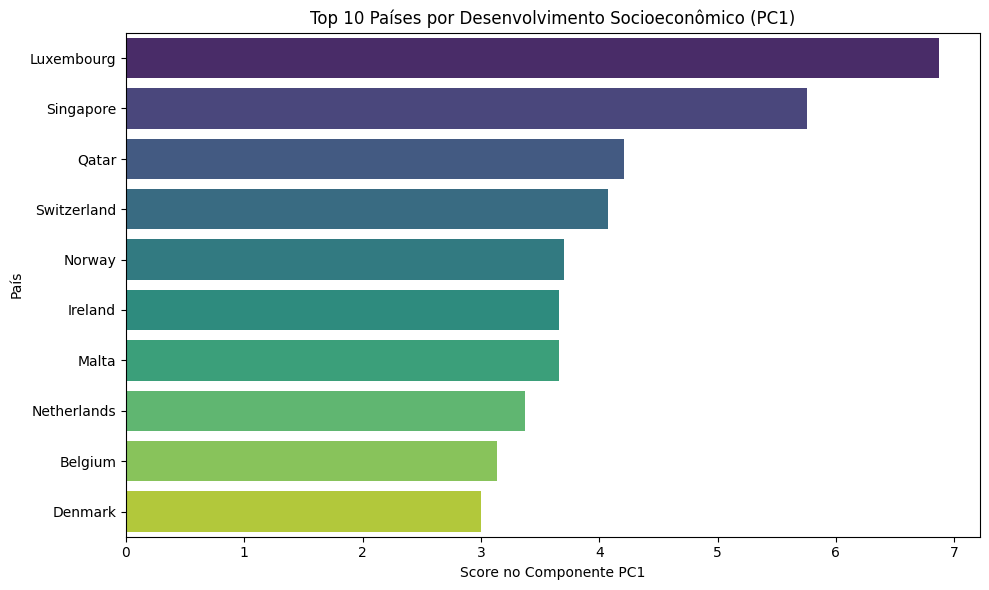

In [68]:
# Criando Plot com os 10 países com maior PC1
plt.figure(figsize=(10, 6))
sns.barplot(data=top_paises, y='país', x='PC1', palette='viridis')
plt.title("Top 10 Países por Desenvolvimento Socioeconômico (PC1)")
plt.xlabel("Score no Componente PC1")
plt.ylabel("País")
plt.tight_layout()
plt.show()


## Conclusão e Recomendação Estratégica

A análise por PCA revelou padrões estruturais entre os países analisados. O PC1 se destacou como um eixo claro de desenvolvimento socioeconômico, o que permite orientar decisões de negócio com base em dados objetivos.

A recomendação é iniciar a expansão internacional priorizando os países com maior score no PC1, pois apresentam maior potencial de retorno e menor risco de operação.

Esta análise pode ser complementada futuramente com dados de consumo específicos do setor alimentício para refinar ainda mais as decisões.


## Próximos Passos e Considerações Estratégicas

A análise por PCA permitiu uma primeira triagem de países com base em fatores macroeconômicos estruturais, uma etapa essencial para reduzir riscos iniciais em uma estratégia de expansão global.

Entretanto, para uma recomendação de implantação ainda mais robusta, recomenda-se aprofundar a análise com dados complementares diretamente ligados ao mercado de atuação da rede, como:

- **Consumo per capita de fast-food** ou produtos similares
- **Perfil demográfico urbano/rural** da população
- **Poder de compra local e comportamento do consumidor**
- **Presença e força de concorrentes diretos** em cada país
- **Indicadores de logística, infraestrutura e custo operacional**

Essa segunda camada de análise, mais específica e voltada ao comportamento de consumo, pode ser integrada por meio de fontes como Euromonitor, Nielsen, dados governamentais, ou APIs de inteligência de mercado.

Essa abordagem combinada entre análise estrutural (via PCA) e análise de mercado (via dados setoriais) cria um modelo decisório de alto valor estratégico para a diretoria, unindo clareza visual com foco em resultado real.

---
